Hello readers, I am sure that you all pay for your insurance and get medical service. So, I would like to analysis the dataset called "medical cost" and introduce what kind of people pay more medical cost. Moreover, I would like to find out what kind of people have unhealthy or healthy lifestyle or consition such as smoking and bmi. 

---

bold Table of Contents bold 

 - Loading dataset and introduction of it, 
 - introduction of my reserch questions,
 - data visualization,
 - answering the reserch questions 
 - wrap up my analysis

## Loading dataset and introduction of it

So first, I would like to load the dataset and give it a name "medical_cost"

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
medical_cost = pd.read_csv("https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv")

In [10]:
medical_cost

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


So, this the dataset called "medical cost". It has age, sex, bmi, how many people the example pay for their medical service, if they smoke or not, where they live and their charges for medical service. As you can see, we have 1338 examples.

Now, I clean up the dataset. Here, cleaning up the dataset means dropping null values, changing solumn's name, resetting and dropping column and sort the data.

First, I drop the null datas. If there is null value in at least one column, I drop the data. Next, I chenge the name of column from "chartges" to "cost". Then, I reset the index and drop the column called "index", which I made from resetting the index. Finally, I sort the data by age in ascending order. 

In [11]:
medical_cost=(medical_cost
              .dropna()
              .rename(columns={'charges': 'cost'})
              .reset_index()
              .drop(columns=['index'])
              .sort_values(by=['age'])
              )

In [12]:
medical_cost

,age,sex,bmi,children,smoker,region,cost
1248,18,female,39.820,0,no,southeast,1633.96180
482,18,female,31.350,0,no,southeast,1622.18850
492,18,female,25.080,0,no,northeast,2196.47320
525,18,female,33.880,0,no,southeast,11482.63485
529,18,male,25.460,0,no,northeast,1708.00140
...,...,...,...,...,...,...,...
398,64,male,25.600,2,no,southwest,14988.43200
335,64,male,34.500,0,no,southwest,13822.80300
378,64,female,30.115,3,no,northwest,16455.70785
1265,64,male,23.760,0,yes,southeast,26926.51440


And the above is the cleaned data!

So I set the method chaining. I put the all function I used to clean the data to one function. 

In [13]:
def cleaning(data):
    data=(data
              .dropna()
              .rename(columns={'charges': 'cost'})
              .reset_index()
              .drop(columns=['index'])
              .sort_values(by=['age'])
              )

In [32]:
#On March 17 I worked with my TA and we could not figure out how to solve this error.

#from scripts import project_function

#medical_cost=project_function.cleaning(medical_cost)
#medical_cost

## Introduction of my research questions

Now, let me introdyce my research questions I made in milestone 1. 

 - I am interested in which column is strongly related to medical cost. AKA, what kind pf people pay the medical cost most?
 - What kind of people tend to have unhealthy habit or condition?

italic In the second question, u healthy habit means smoking and unhealthy condition means out range of BMI. italic

To answer these questions, I would like to create some data visualizations to make the data easy to understand to human beings. 

## data visualization (EDA)

<AxesSubplot:xlabel='bmi', ylabel='cost'>

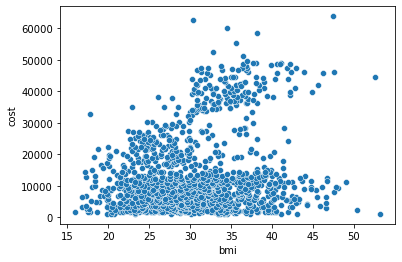

In [22]:
sns.scatterplot(data=medical_cost,x="bmi",y="cost")

This scatterplot shows the relationship between the medical cost and examples' bmi. 

Now, I would like to see the relationship between the cost and smoking. 

<AxesSubplot:xlabel='smoker', ylabel='cost'>

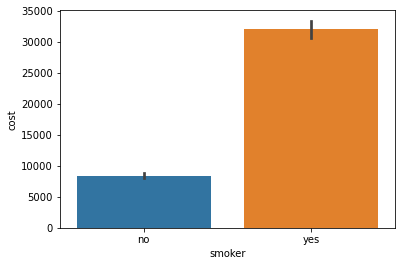

In [35]:
sns.barplot(data=medical_cost,y="cost",x="smoker")

This bar plot shows the relationship between cost on y-axis and if they smoke or not which is on x-axis.

Visualization of children and cost

<AxesSubplot:xlabel='children', ylabel='cost'>

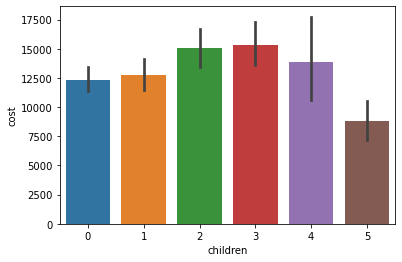

In [36]:
sns.barplot(data=medical_cost,y="cost",x="children")

This bar plot shows the relationship between cost and the number of children the examples pay medical cost.

I also would like to see if their age affects to their medical cost. 

<AxesSubplot:xlabel='age', ylabel='cost'>

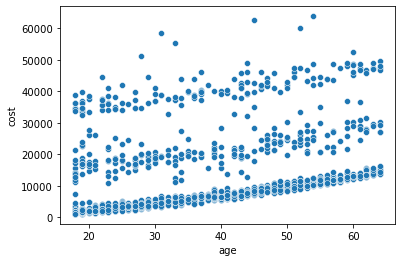

In [24]:
sns.scatterplot(data=medical_cost, y="cost",x="age")

This is a scatterplot and it shows the relationship between cost and examples' age.

In [16]:
smokers=medical_cost.drop(medical_cost[medical_cost['smoker']=='no'].index)
smokers

,age,sex,bmi,children,smoker,region,cost
623,18,male,33.535,0,yes,northeast,34617.84065
57,18,male,31.680,2,yes,southeast,34303.16720
1282,18,female,21.660,0,yes,northeast,14283.45940
759,18,male,38.170,0,yes,southeast,36307.79830
157,18,male,25.175,0,yes,northeast,15518.18025
...,...,...,...,...,...,...,...
664,64,female,22.990,0,yes,southeast,27037.91410
890,64,female,26.885,0,yes,northwest,29330.98315
420,64,male,33.880,0,yes,southeast,46889.26120
328,64,female,33.800,1,yes,southwest,47928.03000


The above is sub-dataset of medical cost and contains only smokers.

In [20]:
non_smokers=medical_cost.drop(medical_cost[medical_cost['smoker']=='yes'].index)
non_smokers

,age,sex,bmi,children,smoker,region,cost
1248,18,female,39.820,0,no,southeast,1633.96180
482,18,female,31.350,0,no,southeast,1622.18850
492,18,female,25.080,0,no,northeast,2196.47320
525,18,female,33.880,0,no,southeast,11482.63485
529,18,male,25.460,0,no,northeast,1708.00140
...,...,...,...,...,...,...,...
402,64,female,32.965,0,no,northwest,14692.66935
398,64,male,25.600,2,no,southwest,14988.43200
335,64,male,34.500,0,no,southwest,13822.80300
378,64,female,30.115,3,no,northwest,16455.70785


<AxesSubplot:xlabel='bmi', ylabel='Density'>

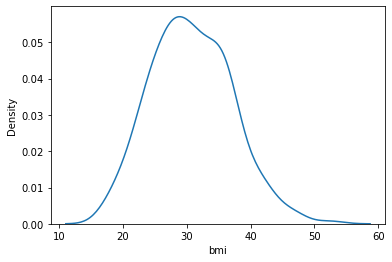

In [51]:
sns.kdeplot(smokers['bmi'])

This plot shoes the distribution of bmi in smokers

<AxesSubplot:xlabel='bmi', ylabel='Density'>

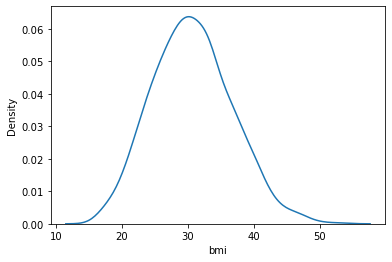

In [52]:
sns.kdeplot(non_smokers['bmi'])

This plot shows the distribution of bmi in non-smokers.

<AxesSubplot:xlabel='count', ylabel='children'>

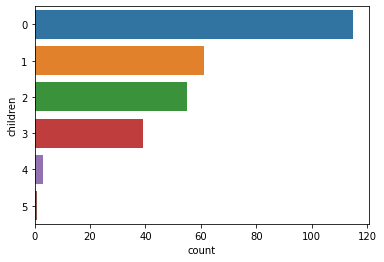

In [18]:
sns.countplot(data=smokers,y='children',order=smokers.children.value_counts().index)

This barplot shows how many children smokers have.

<AxesSubplot:xlabel='count', ylabel='children'>

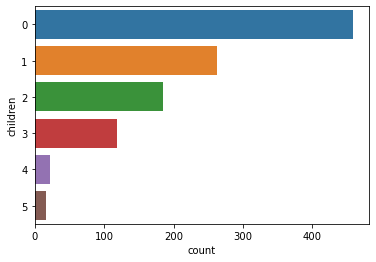

In [21]:
sns.countplot(data=non_smokers,y='children',order=non_smokers.children.value_counts().index)

This bar plot show how many children non-smokers have.

<AxesSubplot:xlabel='age', ylabel='Density'>

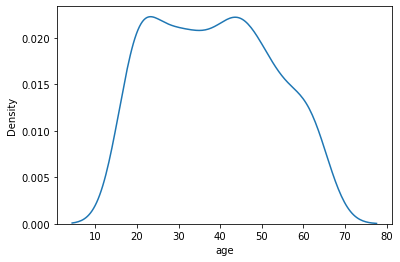

In [25]:
sns.kdeplot(smokers["age"])

The above is kde plot which shows the density of age in smokers. 

<AxesSubplot:xlabel='age', ylabel='Density'>

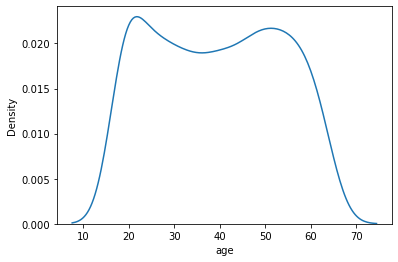

In [27]:
sns.kdeplot(non_smokers["age"])

The above is kde plot which shows the density of age in non-smokers.

<AxesSubplot:xlabel='sex', ylabel='age'>

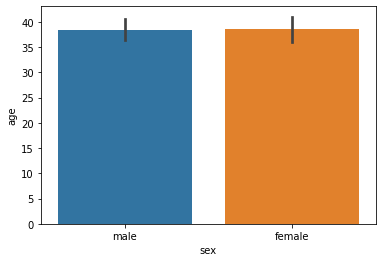

In [28]:
sns.barplot(data=smokers,y="age",x="sex")

<AxesSubplot:xlabel='sex', ylabel='age'>

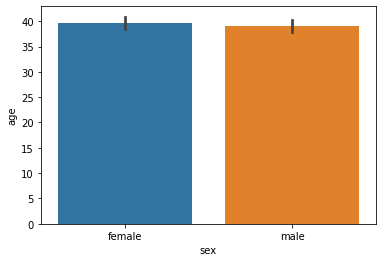

In [29]:
sns.barplot(data=non_smokers,y="age",x="sex")

<AxesSubplot:xlabel='count', ylabel='region'>

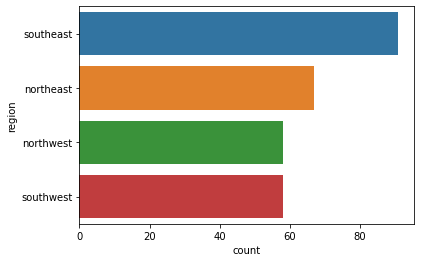

In [34]:
sns.countplot(data=smokers,y='region',order=smokers.region.value_counts().index)

This is the countplot of region where they live in smokers.

<AxesSubplot:xlabel='count', ylabel='region'>

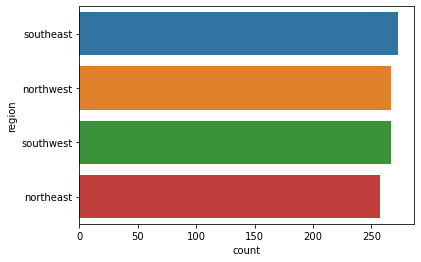

In [31]:
sns.countplot(data=non_smokers,y='region',order=smokers.region.value_counts().index)

This is the countplot shows where they live in non-smokers. 

## answering the reserch questions (Analysis)

Let me mention my research questions again. my reseqarch questions are

What kind of people tend to have unhealthy habit or condition? 
 - I am interested in which column is strongly related to medical cost. AKA, what kind pf people pay the medical cost most?
 - What kind of people tend to have unhealthy habit or condition?

After making some datavisualizations, I found some columns are affecting the medical cost. Age and smoking.

<AxesSubplot:xlabel='smoker', ylabel='cost'>

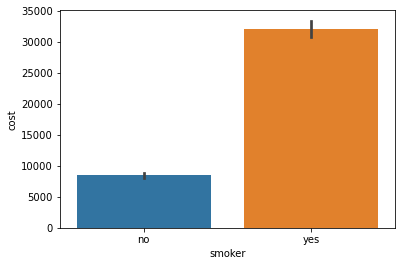

In [35]:
sns.barplot(data=medical_cost,y="cost",x="smoker")

Bar plot shows the avarage of the data and sometimes it is not relevant to trust them. However, here is obvious that smokers pay more tha non-smokers do. The average cost of non-smoker is around 8000 and the everage of smorkers is around 32500.

Age is less affecting than smoking but I still like to say age is positively related to the medical cost.

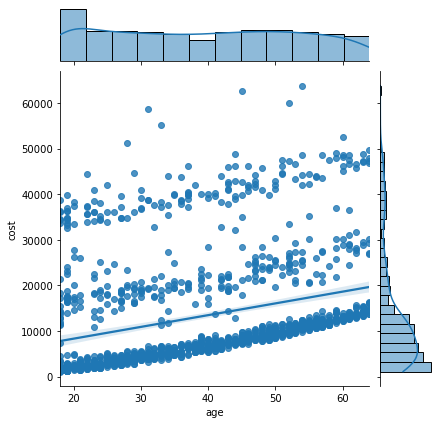

In [36]:
sns.jointplot(data=medical_cost, y="cost",x="age",kind='reg')

I found this visualization interesting since I see three groups of people: the biggest group on the bottom lies between 0 to over 10000, the second biggest group is above 10000 and over 20000, and finally the third biggest group between around 30000 and around 50000. And the all of the groups has gradual positive slope. So I would say, in any age, there are some people who pay extra cost than others who is about the same age. I am sure that I can tell you there is a positive 
effect to the cost but there might be more than positive relationship. 

The reason I can say smoking has bigger effect on the cost is the barplot showing us the aberage and it has a big gap. For the age, if we take a look at the jointplot, the slope is loose. 

And, other columns such as how many kids they have and bmi have no or rarely have a positive or negative relationship. So I would like to say smoking has the biggest effect on the cost. 

Now, let's moveon to the next question.

What kind of people tend to have unhealthy habit or condition?

After finding the answer for the first question, I would like to say smoking is the unhealthy behaviour because it has a big effect on the medical cost. 

It was hard to find the relationship between smoking and other column which is affecting or has relationship with smoking.
And finally, the area the examples live has the biggest relationship with smoking. Before that, let me show my sub datasets.

In [37]:
smokers=medical_cost.drop(medical_cost[medical_cost['smoker']=='no'].index)
smokers

,age,sex,bmi,children,smoker,region,cost
623,18,male,33.535,0,yes,northeast,34617.84065
57,18,male,31.680,2,yes,southeast,34303.16720
1282,18,female,21.660,0,yes,northeast,14283.45940
759,18,male,38.170,0,yes,southeast,36307.79830
157,18,male,25.175,0,yes,northeast,15518.18025
...,...,...,...,...,...,...,...
664,64,female,22.990,0,yes,southeast,27037.91410
890,64,female,26.885,0,yes,northwest,29330.98315
420,64,male,33.880,0,yes,southeast,46889.26120
328,64,female,33.800,1,yes,southwest,47928.03000


The above is a sub-dataset of medical cost and it contains only smokers. 

In [38]:
non_smokers=medical_cost.drop(medical_cost[medical_cost['smoker']=='yes'].index)
non_smokers

,age,sex,bmi,children,smoker,region,cost
1248,18,female,39.820,0,no,southeast,1633.96180
482,18,female,31.350,0,no,southeast,1622.18850
492,18,female,25.080,0,no,northeast,2196.47320
525,18,female,33.880,0,no,southeast,11482.63485
529,18,male,25.460,0,no,northeast,1708.00140
...,...,...,...,...,...,...,...
402,64,female,32.965,0,no,northwest,14692.66935
398,64,male,25.600,2,no,southwest,14988.43200
335,64,male,34.500,0,no,southwest,13822.80300
378,64,female,30.115,3,no,northwest,16455.70785


The above is a sub-dataset of medical cost and it only contains non-smokers. 

<AxesSubplot:xlabel='count', ylabel='region'>

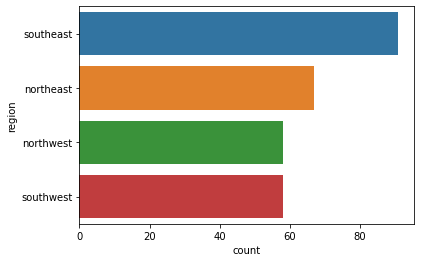

In [39]:
sns.countplot(data=smokers,y='region',order=smokers.region.value_counts().index)

As you can see, many smokers live in southeast and second majority live in northeast.

<AxesSubplot:xlabel='count', ylabel='region'>

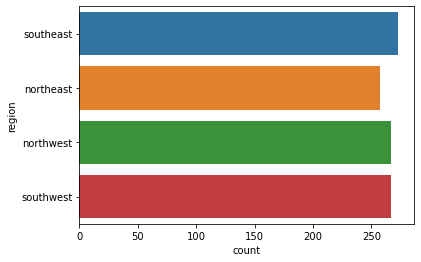

In [40]:
sns.countplot(data=non_smokers,y='region',order=smokers.region.value_counts().index)

The above is where non-smokers live. As you can see they live aoutheast, northeast, northwest and southwest equally. 

Surprisingly, bmi or number of kids do not affect to the smoking population and it is out of my predict. I thought number of children has the most effect because rasing kids are fun but stressfull. 